In [1]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv("Social_Network_Ads.csv")

In [20]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb = LabelEncoder()

In [23]:
data['Gender'] = lb.fit_transform(data['Gender'])

In [24]:
data['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
sc = StandardScaler()
X = data.drop('Purchased',axis=1)
y = data['Purchased']
X = sc.fit_transform(X)
print(X)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
clf.fit(x_train,y_train)
y_Pred = clf.predict(x_test)
y_Pred
accuracy_score(y_test, y_Pred)

[[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.52039175 -0.98019606  1.17910958 -1.46068138]
 [ 0.88695546  1.02020406 -0.15807423 -1.07893824]
 [-1.36231017 -0.98019606  1.08359645 -0.99084367]]


0.8

In [64]:
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,None]}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rcv = RandomizedSearchCV(clf,param_distributions=param_dict,cv=10,n_jobs=-1)

In [67]:
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [68]:
y_pred_rcv= rcv.predict(x_test)

In [69]:
rcv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
rcv.best_params_

{'max_depth': 2, 'criterion': 'entropy'}

In [71]:
rcv.best_score_

0.903125

In [72]:
accuracy_score(y_test, y_pred_rcv)

0.9

After RandomSearch setting Paramaters


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_param = DecisionTreeClassifier(max_depth= 2, criterion= 'gini')
sc = StandardScaler()
X = data.drop('Purchased',axis=1)
y = data['Purchased']
X = sc.fit_transform(X)
print("After Scaler : \n",X)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
clf_param.fit(x_train,y_train)
y_Pred = clf_param.predict(x_test)
print("y_Pred: \n", y_Pred)
print("Accuracy Score : \n",accuracy_score(y_test, y_Pred))

After Scaler : 
 [[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.52039175 -0.98019606  1.17910958 -1.46068138]
 [ 0.88695546  1.02020406 -0.15807423 -1.07893824]
 [-1.36231017 -0.98019606  1.08359645 -0.99084367]]
y_Pred: 
 [1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1]
Accuracy Score : 
 0.9375


In [84]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,20

In [85]:
from sklearn.tree import plot_tree

[Text(471.8382352941176, 1026.8, 'X[2] <= 0.463\ngini = 0.466\nsamples = 320\nvalue = [202, 118]'),
 Text(262.5882352941176, 906.0, 'X[3] <= 0.61\ngini = 0.291\nsamples = 232\nvalue = [191, 41]'),
 Text(131.2941176470588, 785.2, 'X[2] <= -0.11\ngini = 0.088\nsamples = 194\nvalue = [185, 9]'),
 Text(98.47058823529412, 664.4, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]'),
 Text(164.1176470588235, 664.4, 'X[3] <= 0.081\ngini = 0.262\nsamples = 58\nvalue = [49, 9]'),
 Text(65.6470588235294, 543.6, 'X[0] <= -1.627\ngini = 0.091\nsamples = 42\nvalue = [40, 2]'),
 Text(32.8235294117647, 422.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(98.47058823529412, 422.79999999999995, 'X[2] <= -0.015\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(65.6470588235294, 302.0, 'X[0] <= 0.822\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(32.8235294117647, 181.19999999999993, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(98.47058823529412, 181.19999999999993, 'gini = 0.0\ns

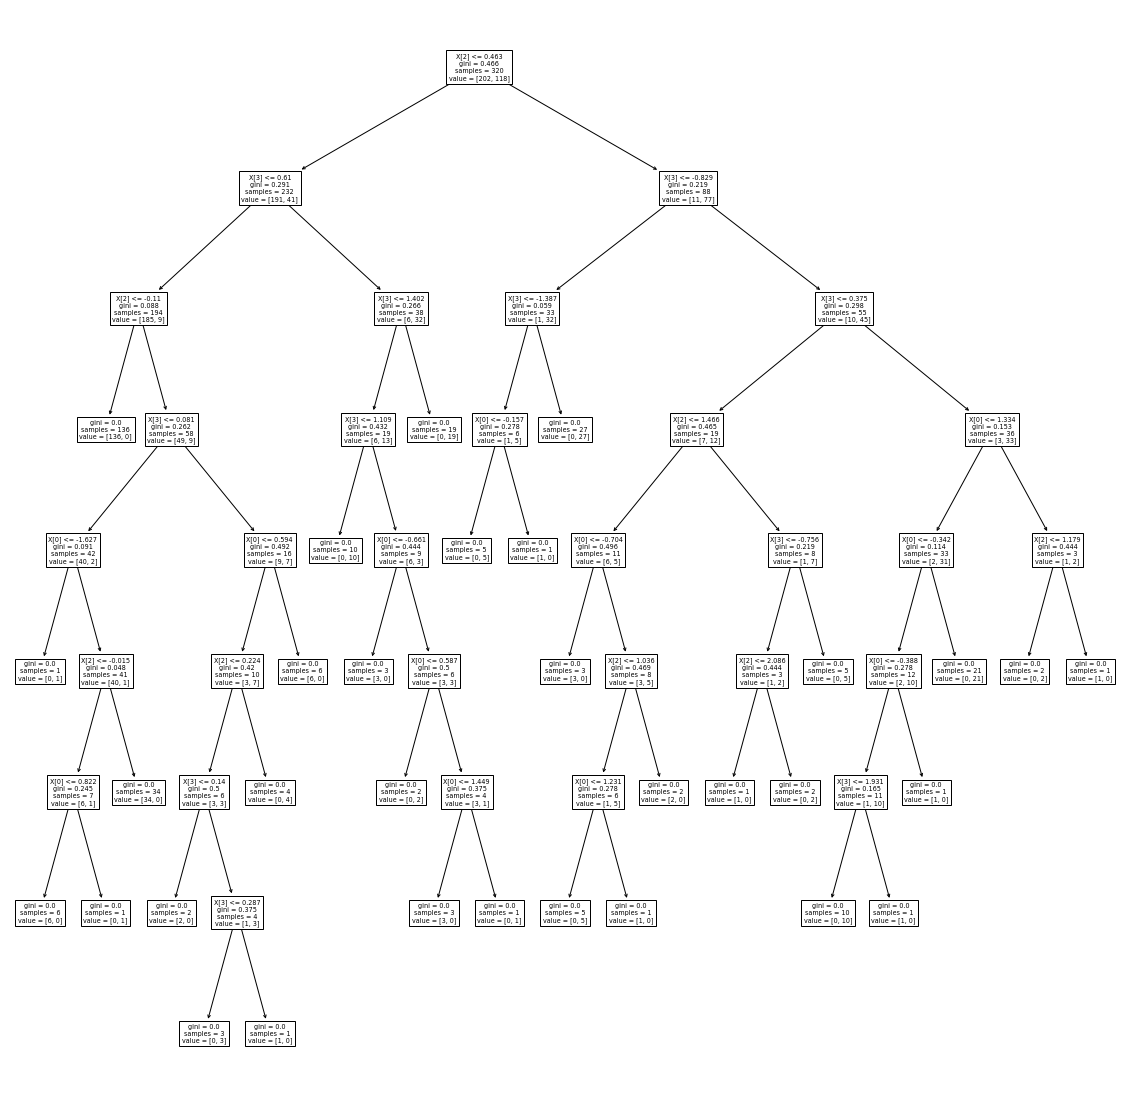

In [86]:
plot_tree(clf)

[Text(558.0, 906.0, 'X[2] <= 0.463\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(279.0, 543.6, 'X[3] <= 0.61\ngini = 0.276\nsamples = 230\nvalue = [192, 38]'),
 Text(139.5, 181.19999999999993, 'gini = 0.07\nsamples = 194\nvalue = [187, 7]'),
 Text(418.5, 181.19999999999993, 'gini = 0.239\nsamples = 36\nvalue = [5, 31]'),
 Text(837.0, 543.6, 'X[3] <= -0.829\ngini = 0.306\nsamples = 90\nvalue = [17, 73]'),
 Text(697.5, 181.19999999999993, 'gini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(976.5, 181.19999999999993, 'gini = 0.387\nsamples = 61\nvalue = [16, 45]')]

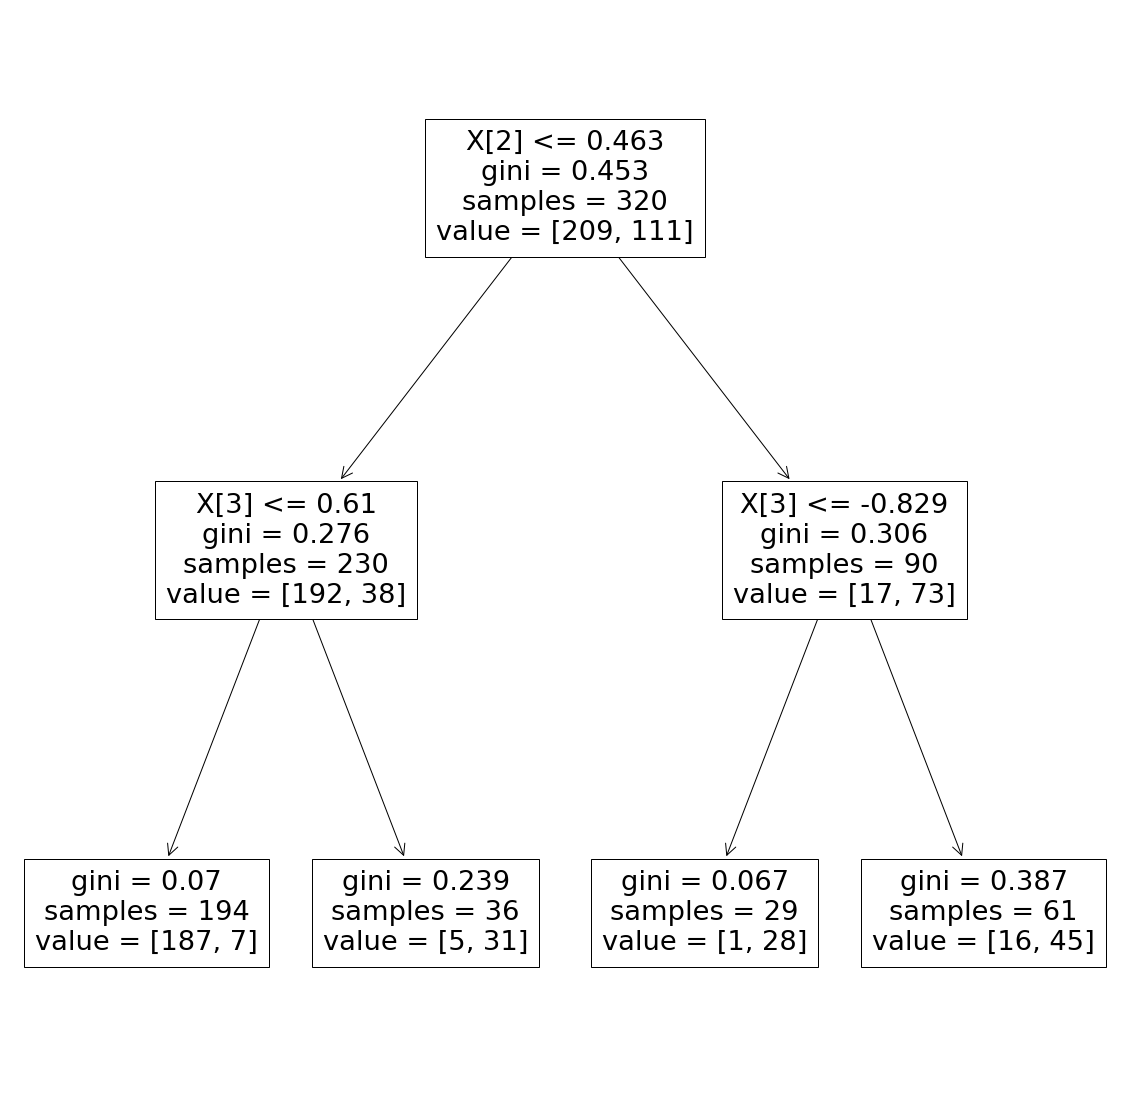

In [97]:
plot_tree(clf_param)